# Notebook de la práctica 3 de **FAA**.

**Javier López Cano y Gonzalo Madrigal.** Grupo 1462.

In [1]:
# -*- coding: utf-8 -*-

# coding: utf-8
from Datos import Datos
import numpy as np
from Clasificador import Clasificador, ClasificadorNaiveBayes, ClasificadorGenetico
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import matplotlib.pyplot as	plt


Función para representar gráficamente los valores para la **curva ROC**.

In [2]:

def valores_roc(data, pred):
    fp = 0
    fn = 0
    tp = 0
    tn = 0
    for i in range(0, len(pred)):
        if pred[i] == data[i]:
            if pred[i] == 1:
                tp += 1
            elif pred[i] == 0:
                tn += 1
        elif pred[i] != data[i]:
            if pred[i] == 1:
                fp += 1
            elif pred[i] == 0:
                fn += 1
    return tp, tn, fp, fn


Procesamos el dataset *Titanic* para trabajar con él

In [3]:

    titanic = Datos("titanic.data", allNominal=True)

    print("Titanic:\n")
    print("nominalAtributos:")
    print(titanic.nominalAtributos)
    print("\nDiccionario:")
    print(titanic.diccionario)
    print("\nDatos:")
    print(titanic.datos)




Titanic:

nominalAtributos:
[True, True, True, True]

Diccionario:
{'Pclass': {'1': 0, '2': 1, '3': 2}, 'Sex': {'female': 0, 'male': 1}, 'Age': {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '9': 15}, 'Class': {'0': 0, '1': 1}}

Datos:
[[ 1  1  9  1]
 [ 1  1 12  1]
 [ 2  0 10  0]
 ...
 [ 2  0 10  1]
 [ 2  1 10  0]
 [ 1  1  9  0]]


En esta última práctica de FAA hemos implementado un **algoritmo genético**. Estos métodos emulan el funcionamiento de la evolución biológica. Se somete a una población de individuos a una serie de acciones aleatorias (**mutaciones** y **recombinaciones**) y a un proceso de selección, que en este caso llevará a cabo la **función de fitness**, para que solo "sobrevivan" los individuos mejor adaptados y sus descendientes. Al cabo de una serie de generaciones, los individuos de nuestra población estarán mejor adaptados al problema que queremos solucionar que los originales.


La opción utilizada en esta práctica para la aproximación del cromosoma es el enfoque de $\textit{Pittsburg}$, haciendo que cada individuo represente un conjunto de reglas. El número de estas reglas será variable en función de lo que indiquemos al crear el clasificador. A continuación dejamos comentado el código utilizado para llegar a la conclusión de que la mejor opción es tamaño de regla = 10 y ambas probabilidades = 1. Esto es así porque al pasar a la siguiente generación el mejor 5% de los individuos, nunca perderemos a los mejores por muchas mutaciones y recombinaciones que hagamos.

In [4]:
 ##################################################################################################################
    # HALLAR MEJORES PROBABILIDADES Y TAMAÑO DE REGLA (NO EJECUTAR, sale tamaño de regla 10, y ambas probs 1)
    #args = {"epocas": 100, "pob_size": 50, "max": 3, "prob_cruce": 0.5, "prob_mutacion": 0.1, "plot": False}
    #best_err = 1
    #best_args = {}
    #for max_reg in range(1, 11):
    #    args["max"] = max_reg
    #    gen = ClasificadorGenetico()
    #    vs = ValidacionSimple()
    #    error = Clasificador.validacion(vs, titanic, gen, args=args)
    #    if error[0] < best_err:
    #        best_err = error[0]
    #        best_args = args

    #args["max"] = best_args["max"]

    #best_err = 1
    #best_args = {}
    #for prob_cruce in np.arange(0, 1, 0.05):
    #    args["prob_cruce"] = prob_cruce
    #    gen = ClasificadorGenetico()
    #    vs = ValidacionSimple()
    #    error = Clasificador.validacion(vs, titanic, gen, args=args)
    #    if error[0] < best_err:
    #        best_err = error[0]
    #        best_args = args

    #args["prob_cruce"] = best_args["prob_cruce"]
    
    #for prob_mutacion in np.arange(0, 1, 0.05):
    #    args["prob_mutacion"] = prob_mutacion
    #    gen = ClasificadorGenetico()
    #    vs = ValidacionSimple()
    #    error = Clasificador.validacion(vs, titanic, gen, args=args)
    #    # print("Error medio " + str(error[0]))
    #    if error[0] < best_err:
    #        best_err = error[0]
    #        best_args = args

    #print(str(best_args))

    ###################################################################################################################

El **mecanismo de cruce** que hemos elegido es el **cruce en un punto**. Para cada par de padres se elige un punto aleatorio por el que se corta el cromosoma. De esta forma, ambos quedan divididos en dos segmentos, que se recombinan para generar dos descendientes siempre que se cumpla la **probabilidad de cruce**. Se podría repetir el proceso para dos o tres puntos si es que se cumple la probabilidad.

En el caso de la **mutación**, consiste simplemnete en cambiar un bit si se cumple la probabilidad. Una probabilidad de mutación muy baja puede llevarnos al fenómeno de **deriva genética**, y una muy alta (aunque no en este caso) podría hacer que perdiéramos los mejores individuos por mutarlos.

Para la **clasificación**, el mecanismo que hemos utilizado consiste en evaluar las reglas del mejor individuo sobre el conjunto de datos de entrenamiento. La **función de fitness** es una parte crítica de un algoritmo genético, ya que es aquí donde se va a dar la selección de los mejores individuos. Siempre se debe tener en cuenta el coste computacional ya que se va a repetir su ejecución de forma prácticamente ininterrumpida; sin embargo debe ser lo suficientemente precisa para detectar los mejores individuos en cada iteración.



Titanic:

Validación Simple, Población 50, 100 épocas


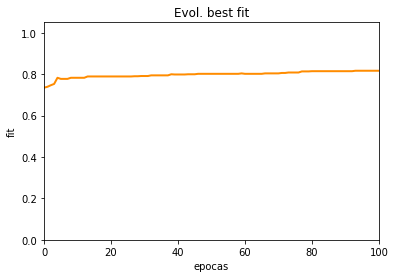

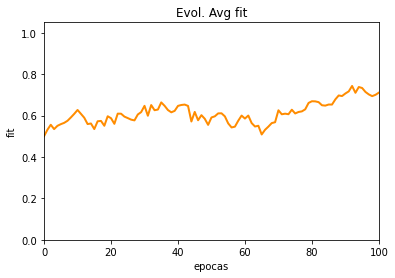

Mejor conjunto de reglas:
00000100011000111101001111010101010011110000001111011101101111000100111111111001111011110000010000100011111010000001001101001110111100111011111010111100010111010111100111111010000001011110101111111000101011000000111111110100010111010011101111001110111110011111110111001001111000111111110000010101010011110000000001011110011110101100110101111001111110100000011111100011111111000001000110101111000011110100010010100101101010101111011011101111001110111110011111110111001001111000111111110000010101010011110000001111111110011111111100000100011000111101001111010001001110010110
Error en partición 0[0.25961538461538464]

Error medio: 0.25961538461538464


Validación Simple, Población 50, 200 épocas


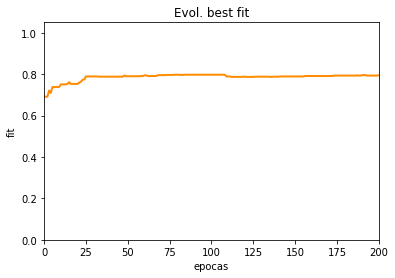

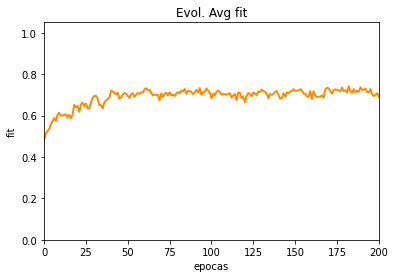

Mejor conjunto de reglas:
1001001111111101001011111101011110111100111000000111111011101100001000011111011110100011110100111110101100111000000111111011100100001000011011011111011111110110111100101010101011000111110001010010111111011111001101111000111100111111100010010111010100010111010010001101011111001011111110
Error en partición 0[0.22115384615384615]

Error medio: 0.22115384615384615


Validación Simple, Población 150, 100 épocas


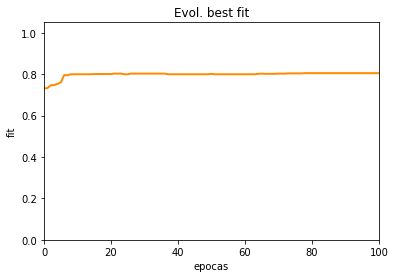

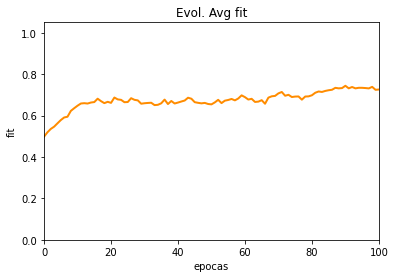

Mejor conjunto de reglas:
11101001001011010111001101001100101100110010010101000010111001000111110100110001011000000100010101101100010001111101011000110001110011010011101001001101001101001110100111111110110100111010000010010111110110110001111100100100010100100100000101010101010010000011000101110000001111010111001101001110101100110010010111010000111001000101000101010011110011001101010110001100000000110100111010010011000101110000011001001111011111010110001000110100110100111010010011010011010011101001111111100100110100100000110101011110101110011101110011110110110000010100100101010011001110100101111101101100011100111011010101100001001001011111011011000111001110110111011000011101110011010011101001001100100111010011000100100000010011010010000011010101111000011011000100011111010111001000010000110100111001101001000110000101001001111100101100010100100100000101010101001110011101110011000111001011100000011111010001000101100010110000000110110001000011010011100001001101001101001110100111110010010001

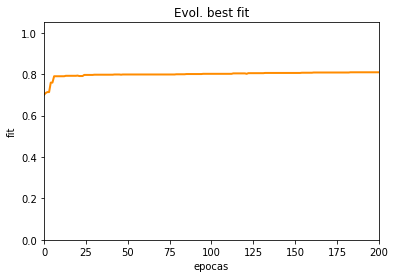

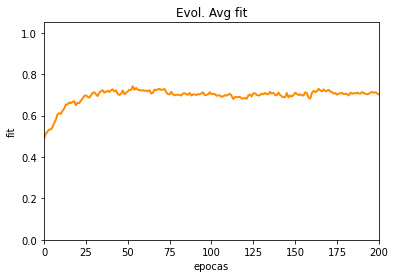

Mejor conjunto de reglas:
10001110010100110110001010111000010100011101110100110010011101011010001110110100000111011001011010001001101000100101010001010001010111010011011000110111101000110010011101001111010001100101010101111000001110110111000111111011011101010101011110010101110100010110000011001010010001110011111010111001000100011101110101010101111100111011110100110001011000000101000101010111000000100011100101010100110111001110010101010010000100111001000100110100
Error en partición 0[0.20192307692307693]

Error medio: 0.20192307692307693



In [5]:
    args = {"epocas": 100, "pob_size": 50, "max": 3, "prob_cruce": 0.7, "prob_mutacion": 0.5, "plot": True}
    print("\n\nTitanic:")
    print("\nValidación Simple, Población 50, 100 épocas")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    error = Clasificador.validacion(vs, titanic, gen, args=args)
    print("\nError medio: " + str(error[0]) + "\n")

    args["epocas"] = 200
    print("\nValidación Simple, Población 50, 200 épocas")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    error = Clasificador.validacion(vs, titanic, gen, args=args)
    print("\nError medio: " + str(error[0]) + "\n")

    args["epocas"] = 100
    args["pob_size"] = 150
    print("\nValidación Simple, Población 150, 100 épocas")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    error = Clasificador.validacion(vs, titanic, gen, args=args)
    print("\nError medio: " + str(error[0]) + "\n")

    args["epocas"] = 200
    print("\nValidación Simple, Población 150, 200 épocas")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    error = Clasificador.validacion(vs, titanic, gen, args=args)
    print("\nError medio: " + str(error[0]) + "\n")

Como podemos observar, los resultados se dan conforme a lo esperado. Cuanto mayor es la población sobre la que trabajamos, más "adaptado" estará el mejor individuo que encontremos. Además, cuantas más generaciones dejemos trabajar a nuestro método mejores resultados se obtienen. Estos dos parámetros sin embargo generan cada vez una mejoría menor y un aumento de tiempo de ejecución mayor, por lo que hay que encontrar siempre un término medio acorde a las necesidades del problema a resolver.

A continuación realizamos el **análisis ROC** de nuestro algoritmo genético con diferentes parámetros y lo comparamos con **Naive-Bayes**.

In [6]:
    # Análisis ROC
    args = {"epocas": 100, "pob_size": 50, "max": 3, "prob_cruce": 0.7, "prob_mutacion": 0.5, "plot": False}
    print("50-100")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    vs.creaParticiones(titanic.datos)
    particiones = vs.particiones
    gen.entrenamiento(titanic.extraeDatos(particiones[0].indicesTrain), titanic.nominalAtributos, titanic.diccionario, args)
    datosTest = titanic.extraeDatos(particiones[0].indicesTest)
    result = gen.clasifica(datosTest, titanic.nominalAtributos, titanic.diccionario)
    clase = datosTest[:, len(titanic.nominalAtributos) - 1]
    tp, tn, fp, fn = valores_roc(clase, result[0])
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    X_50_100 = fpr
    Y_50_100 = tpr

50-100


In [7]:
    args["pob_size"] = 150
    print("150-100")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    vs.creaParticiones(titanic.datos)
    particiones = vs.particiones
    gen.entrenamiento(titanic.extraeDatos(particiones[0].indicesTrain), titanic.nominalAtributos, titanic.diccionario,
                      args)  
    datosTest = titanic.extraeDatos(particiones[0].indicesTest)
    result = gen.clasifica(datosTest, titanic.nominalAtributos, titanic.diccionario)
    clase = datosTest[:, len(titanic.nominalAtributos) - 1]
    tp, tn, fp, fn = valores_roc(clase, result[0])
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    X_150_100 = fpr
    Y_150_100 = tpr



150-100


In [8]:

    args["pob_size"] = 50
    args["epocas"] = 200
    print("50-200")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    vs.creaParticiones(titanic.datos)
    particiones = vs.particiones
    gen.entrenamiento(titanic.extraeDatos(particiones[0].indicesTrain), titanic.nominalAtributos, titanic.diccionario,
                      args)
    datosTest = titanic.extraeDatos(particiones[0].indicesTest)
    result = gen.clasifica(datosTest, titanic.nominalAtributos, titanic.diccionario)
    clase = datosTest[:, len(titanic.nominalAtributos) - 1]
    tp, tn, fp, fn = valores_roc(clase, result[0])
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    X_50_200 = fpr
    Y_50_200 = tpr


50-200


In [9]:
    args["pob_size"] = 150
    print("150-200")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    vs.creaParticiones(titanic.datos)
    particiones = vs.particiones
    gen.entrenamiento(titanic.extraeDatos(particiones[0].indicesTrain), titanic.nominalAtributos, titanic.diccionario,
                      args)
    datosTest = titanic.extraeDatos(particiones[0].indicesTest)
    result = gen.clasifica(datosTest, titanic.nominalAtributos, titanic.diccionario)
    clase = datosTest[:, len(titanic.nominalAtributos) - 1]
    tp, tn, fp, fn = valores_roc(clase, result[0])
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    X_150_200 = fpr
    Y_150_200 = tpr

150-200


In [10]:
    print("NB")
    nb = ClasificadorNaiveBayes()
    vs = ValidacionSimple()
    vs.creaParticiones(titanic.datos)
    particiones = vs.particiones
    nb.entrenamiento(titanic.extraeDatos(particiones[0].indicesTrain), titanic.nominalAtributos, titanic.diccionario)
    datosTest = titanic.extraeDatos(particiones[0].indicesTest)
    result = nb.clasifica(datosTest, titanic.nominalAtributos, titanic.diccionario)
    clase = datosTest[:, len(titanic.nominalAtributos) - 1]
    tp, tn, fp, fn = valores_roc(clase, result[0])
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    X_nb = fpr
    Y_nb = tpr

NB


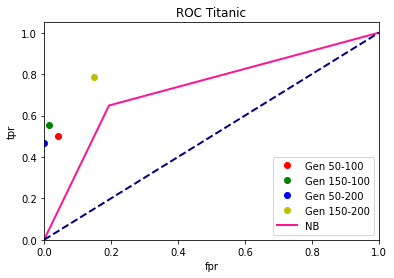

In [11]:
    plt.figure()
    lw = 2
    plt.plot(X_50_100, Y_50_100, "ro", lw=lw, label="Gen 50-100")
    plt.plot(X_150_100, Y_150_100, "go", lw=lw, label="Gen 150-100")
    plt.plot(X_50_200, Y_50_200, "bo", lw=lw, label="Gen 50-200")
    plt.plot(X_150_200, Y_150_200, "yo", lw=lw, label="Gen 150-200")
    plt.plot([0, X_nb, 1], [0, Y_nb, 1], color="deeppink", lw=lw, label="NB")
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC Titanic")
    plt.legend(loc="lower right")
    plt.show()


Como podemos observar el algoritmo genético se encuentra por encima de la curva ROC correspondiente a Naive-Bayes en todas las mediciones que hemos realizado, mejorando a medida que aumentamos el tamaño de la población y el número de generaciones.

In [12]:
    tictac = Datos("tic-tac-toe.data", allNominal=True)

    print("Tic-tac-toe:\n")
    print("nominalAtributos:")
    print(tictac.nominalAtributos)
    print("\nDiccionario:")
    print(tictac.diccionario)
    print("\nDatos:")
    print(tictac.datos)

Tic-tac-toe:

nominalAtributos:
[True, True, True, True, True, True, True, True, True, True]

Diccionario:
{'TLeftSq': {'b': 0, 'o': 1, 'x': 2}, 'TMidSq': {'b': 0, 'o': 1, 'x': 2}, 'TRightSq': {'b': 0, 'o': 1, 'x': 2}, 'MLeftSq': {'b': 0, 'o': 1, 'x': 2}, 'MMidSq': {'b': 0, 'o': 1, 'x': 2}, 'MRightSq': {'b': 0, 'o': 1, 'x': 2}, 'BLeftSq': {'b': 0, 'o': 1, 'x': 2}, 'BMidSq': {'b': 0, 'o': 1, 'x': 2}, 'BRightSq': {'b': 0, 'o': 1, 'x': 2}, 'Class': {'negative': 0, 'positive': 1}}

Datos:
[[2 2 2 ... 1 1 1]
 [2 2 2 ... 2 1 1]
 [2 2 2 ... 1 2 1]
 ...
 [1 2 1 ... 1 2 0]
 [1 2 1 ... 1 2 0]
 [1 1 2 ... 2 2 0]]




Tic-tac-toe:

Validación Simple, Población 50, 100 épocas


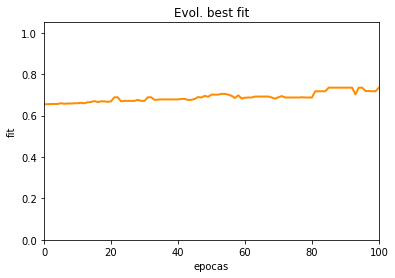

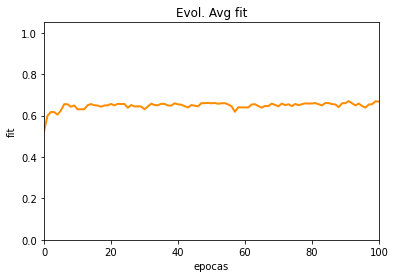

Mejor conjunto de reglas:
1101011111111101111111111101
Error en partición 0[0.29473684210526313]

Error medio: 0.29473684210526313



In [13]:
    # Representamos la evolución del best fit (usamos probabilidades y tamaño de regla mucho más bajas para reducir tiempo de ejecución)
    args = {"epocas": 100, "pob_size": 50, "max": 3, "prob_cruce": 0.7, "prob_mutacion": 0.5, "plot": True}
    print("\n\nTic-tac-toe:")
    print("\nValidación Simple, Población 50, 100 épocas")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    error = Clasificador.validacion(vs, tictac, gen, args=args)
    print("\nError medio: " + str(error[0]) + "\n")


Validación Simple, Población 50, 200 épocas


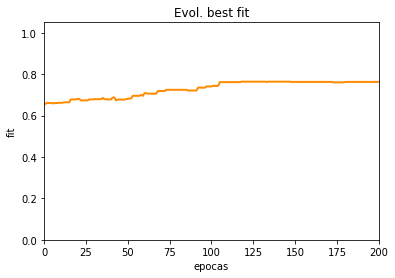

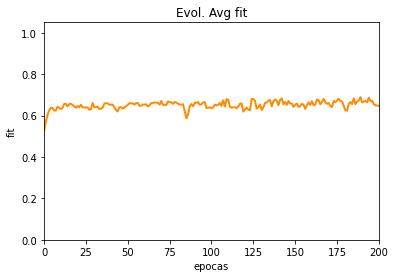

Mejor conjunto de reglas:
110011111100110111100101010111011111111111011111111111010100101111111001101111010100100000111101110111100110101011011011111110011001000111001101111110011101110011101011
Error en partición 0[0.2631578947368421]

Error medio: 0.2631578947368421



In [14]:

    args["epocas"] = 200
    print("\nValidación Simple, Población 50, 200 épocas")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    error = Clasificador.validacion(vs, tictac, gen, args=args)
    print("\nError medio: " + str(error[0]) + "\n")


Validación Simple, Población 150, 100 épocas


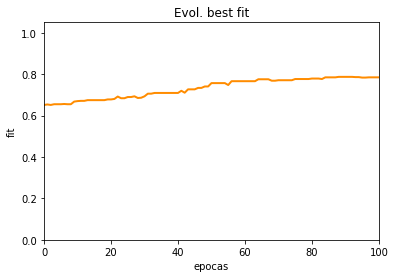

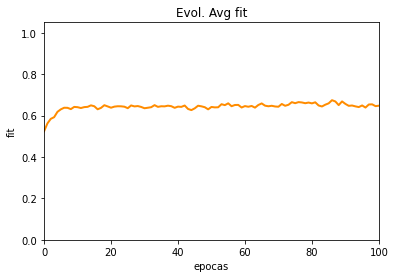

Mejor conjunto de reglas:
11111111110111011111001101111001111100111000101100111110111101111111010011110001101110011111011110000011011111010100011111100001110100001110111011111101100001010010111011011111111111011111001101110001111101111000001101111101010001111110000111010000111011101111111110000111101011101101111111111101111111111101
Error en partición 0[0.23157894736842105]

Error medio: 0.23157894736842105



In [15]:
    args["epocas"] = 100
    args["pob_size"] = 150
    print("\nValidación Simple, Población 150, 100 épocas")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    error = Clasificador.validacion(vs, tictac, gen, args=args)
    print("\nError medio: " + str(error[0]) + "\n")


Validación Simple, Población 150, 200 épocas


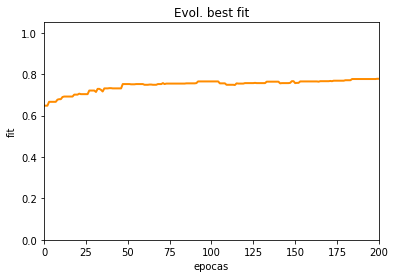

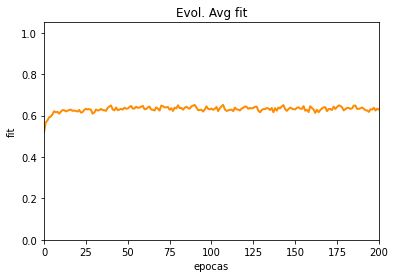

Mejor conjunto de reglas:
11111111011111011111011111110101111110101111110101111111010111110010011101001110111101010000001011111110010000100001011101110101011100010100
Error en partición 0[0.16842105263157894]

Error medio: 0.16842105263157894



In [16]:
    args["epocas"] = 200
    print("\nValidación Simple, Población 150, 200 épocas")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    error = Clasificador.validacion(vs, tictac, gen, args=args)
    print("\nError medio: " + str(error[0]) + "\n")

Como en el caso anterior, a mayor número de generaciones y tamaño de población mejor funciona nuestro algoritmo.

In [17]:
    # Análisis ROC
    args = {"epocas": 100, "pob_size": 50, "max": 3, "prob_cruce": 0.7, "prob_mutacion": 0.5, "plot": False}
    print("50-100")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    vs.creaParticiones(tictac.datos)
    particiones = vs.particiones
    gen.entrenamiento(tictac.extraeDatos(particiones[0].indicesTrain), tictac.nominalAtributos, tictac.diccionario, args)
    datosTest = tictac.extraeDatos(particiones[0].indicesTest)
    result = gen.clasifica(datosTest, tictac.nominalAtributos, tictac.diccionario)
    clase = datosTest[:, len(tictac.nominalAtributos) - 1]
    tp, tn, fp, fn = valores_roc(clase, result[0])
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    X_50_100 = fpr
    Y_50_100 = tpr


50-100


In [18]:
    args["pob_size"] = 150
    print("150-100")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    vs.creaParticiones(tictac.datos)
    particiones = vs.particiones
    gen.entrenamiento(tictac.extraeDatos(particiones[0].indicesTrain), tictac.nominalAtributos, tictac.diccionario,
                      args)
    datosTest = tictac.extraeDatos(particiones[0].indicesTest)
    result = gen.clasifica(datosTest, tictac.nominalAtributos, tictac.diccionario)
    clase = datosTest[:, len(tictac.nominalAtributos) - 1]
    tp, tn, fp, fn = valores_roc(clase, result[0])
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    X_150_100 = fpr
    Y_150_100 = tpr


150-100


In [19]:
    args["pob_size"] = 50
    args["epocas"] = 200
    print("50-200")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    vs.creaParticiones(tictac.datos)
    particiones = vs.particiones
    gen.entrenamiento(tictac.extraeDatos(particiones[0].indicesTrain), tictac.nominalAtributos, tictac.diccionario,
                      args)
    datosTest = tictac.extraeDatos(particiones[0].indicesTest)
    result = gen.clasifica(datosTest, tictac.nominalAtributos, tictac.diccionario)
    clase = datosTest[:, len(tictac.nominalAtributos) - 1]
    tp, tn, fp, fn = valores_roc(clase, result[0])
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    X_50_200 = fpr
    Y_50_200 = tpr

50-200


In [20]:
    args["pob_size"] = 150
    print("150-200")
    gen = ClasificadorGenetico()
    vs = ValidacionSimple()
    vs.creaParticiones(tictac.datos)
    particiones = vs.particiones
    gen.entrenamiento(tictac.extraeDatos(particiones[0].indicesTrain), tictac.nominalAtributos, tictac.diccionario,
                      args)
    datosTest = tictac.extraeDatos(particiones[0].indicesTest)
    result = gen.clasifica(datosTest, tictac.nominalAtributos, tictac.diccionario)
    clase = datosTest[:, len(tictac.nominalAtributos) - 1]
    tp, tn, fp, fn = valores_roc(clase, result[0])
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    X_150_200 = fpr
    Y_150_200 = tpr


150-200


In [21]:
    print("NB")
    nb = ClasificadorNaiveBayes()
    vs = ValidacionSimple()
    vs.creaParticiones(tictac.datos)
    particiones = vs.particiones
    nb.entrenamiento(tictac.extraeDatos(particiones[0].indicesTrain), tictac.nominalAtributos, tictac.diccionario)
    datosTest = tictac.extraeDatos(particiones[0].indicesTest)
    result = nb.clasifica(datosTest, tictac.nominalAtributos, tictac.diccionario)
    clase = datosTest[:, len(tictac.nominalAtributos) - 1]
    tp, tn, fp, fn = valores_roc(clase, result[0])
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    X_nb = fpr
    Y_nb = tpr

NB


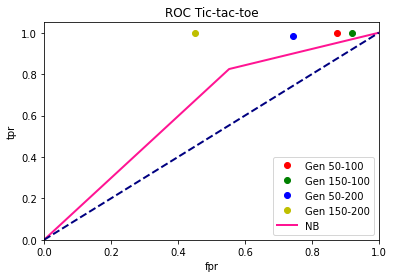

In [22]:
    plt.figure()
    lw = 2
    plt.plot(X_50_100, Y_50_100, "ro", lw=lw, label="Gen 50-100")
    plt.plot(X_150_100, Y_150_100, "go", lw=lw, label="Gen 150-100")
    plt.plot(X_50_200, Y_50_200, "bo", lw=lw, label="Gen 50-200")
    plt.plot(X_150_200, Y_150_200, "yo", lw=lw, label="Gen 150-200")
    plt.plot([0, X_nb, 1], [0, Y_nb, 1], color="deeppink", lw=lw, label="NB")
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC Tic-tac-toe")
    plt.legend(loc="lower right")
    plt.show()

En este caso podemos observar como a medida que aumentamos las generaciones y el tamaño de la población nuestro algoritmo genético se distancia más de la curva dibujada por Naive-Bayes.